In [2]:
#install.packages("fma")
#install.packages("xts")
require(fma)
require(xts)
require(forecast)

Loading required package: fma
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘fma’”Loading required package: forecast
Loading required package: timeDate
This is forecast 7.3 



In [3]:
yahoo <- 'http://ichart.finance.yahoo.com/table.csv?s=H'
data <- read.table(yahoo,sep=',', header = TRUE)
data$Date <- as.Date(data$Date)

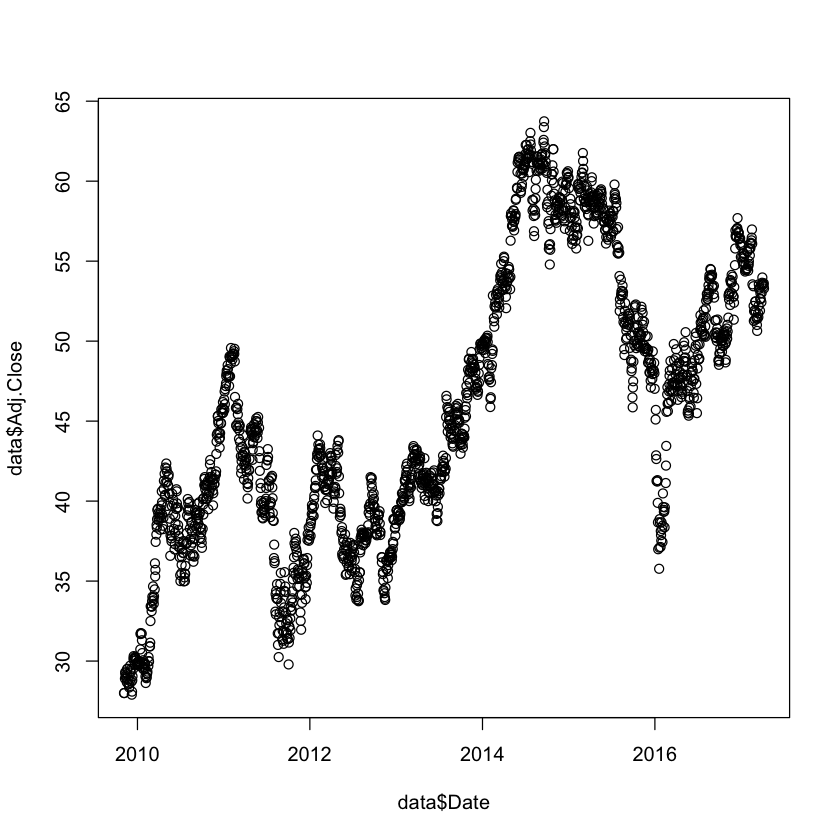

In [4]:
plot(data$Date, data$Adj.Close)

In [ ]:
H_ts_data <- ts(data)
plot(H_ts_data[,"Adj.Close"])
H_xts_data <- xts(data, order.by = data$Date)
plot(H_xts_data$Adj.Close)
# ts is sorted in descending order of data, so the newer dates get the lower index numbers!
data2 <- data[order(data$Date, decreasing = FALSE),]
H_ts_data <- ts(data2)
plot(H_ts_data[,"Adj.Close"])

# Now to limit it to the last two years. 
# ts() objects don't keep the Date, by default, so a window won't quite work.
H <- ts(data[data["Date"] > "2015-04-05",])
plot(H[,"Adj.Close"])
snaive(H[,"Adj.Close"], 10)

meanf()
naive()
snaive()
rwf(y, h, drift=TRUE)